<a href="https://colab.research.google.com/github/Heytec/MachineLearning2/blob/master/Keras_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [22]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf


In [3]:
tf.__version__


'2.1.0'

In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns 

In [0]:
df=pd.read_csv('fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


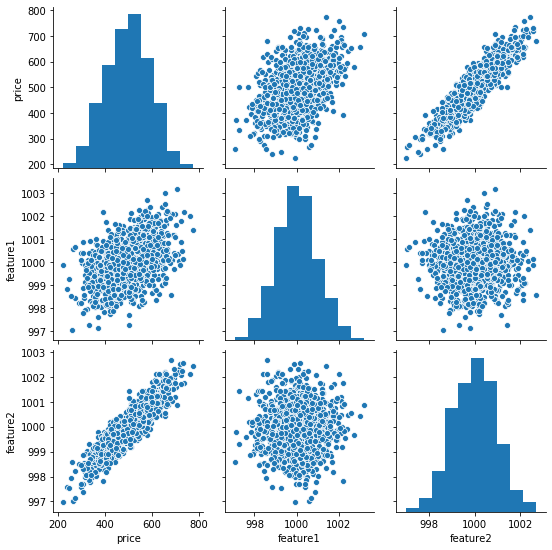

In [5]:
sns.pairplot(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
price       1000 non-null float64
feature1    1000 non-null float64
feature2    1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
df.isnull().sum()

price       0
feature1    0
feature2    0
dtype: int64

In [12]:
df.shape

(1000, 3)

In [0]:
from  sklearn.model_selection import train_test_split

In [0]:
X=df[['feature1','feature2']].values

In [0]:
y=df['price'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train=scaler.transform(X_train)

In [0]:
X_test=scaler.transform(X_test)

In [20]:
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense

In [0]:
#model =Sequential([Dense(4,activation='relu'),
                 #  Dense(2,activation='relu'),
                #   Dense(1)])

In [0]:
model =Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='Adam',loss='mse')



In [27]:
model.fit(X_train,y_train,epochs=250)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 700 samples
Epoch 1/250
700/700 [==============================] - 9s 13ms/sample - loss: 256712.8613
Epoch 2/250
700/700 [==============================] - 0s 58us/sample - loss: 256662.2785
Epoch 3/250
700/700 [==============================] - 0s 63us/sample - loss: 256584.9745
Epoch 4/250
700/700 [==============================] - 0s 64us/sample - loss: 256472.7173
Epoch 5/250
700/700 [==============================] - 0s 67us/sample - loss: 256306.1272
Epoch 6/250
700/700 [==============================] - 0s 63us/sample - loss: 256059.7029
Epoch 7/250
700/700 [==============================] - 0s 66us/sample - loss: 255702.4909
Epoch 8/250
700/700 [==============================] - 0s 68us/sample - loss: 255181.2347
Epoch 9/250
700/700 [==============================] - 0s 64us/sample - loss: 254455.4408
Epoch 10/250
700/700 [==============================] - 0s 62us/sample - loss: 253459.41

In [29]:
pd.DataFrame(model.history.history)

,loss
0,256712.861250
1,256662.278482
2,256584.974464
3,256472.717321
4,256306.127232
...,...
245,227.452945
246,220.539303
247,214.790845
248,208.759701


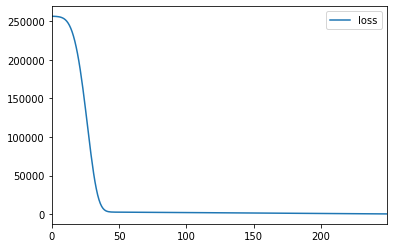

In [30]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [32]:
model.evaluate(X_test,y_test,verbose=0)

11191.165924479166

In [36]:
model.evaluate(X_train,y_train,verbose=0)

198.18594081333706

In [0]:
test_prediction=model.predict(X_test)

In [42]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
test_prediction

0      549.349609
1      549.331177
2      549.331238
3      549.341431
4      549.364258
          ...    
295    549.344238
296    549.359009
297    549.331116
298    549.343140
299    549.353516
Length: 300, dtype: float32

In [44]:
pred_df = pd.concat([pred_df,test_prediction],axis=1)
pred_df

,Test Y,0,0
0,402.296319,549.349609,549.349609
1,624.156198,549.331177,549.331177
2,582.455066,549.331238,549.331238
3,578.588606,549.341431,549.341431
4,371.224104,549.364258,549.364258
...,...,...,...
295,525.704657,549.344238,549.344238
296,502.909473,549.359009,549.359009
297,612.727910,549.331116,549.331116
298,417.569725,549.343140,549.343140


In [0]:
pred_df.columns = ['Test Y','Model Predictions','Model Pred']

In [49]:
pred_df

,Test Y,Model Predictions,Model Pred
0,402.296319,549.349609,549.349609
1,624.156198,549.331177,549.331177
2,582.455066,549.331238,549.331238
3,578.588606,549.341431,549.341431
4,371.224104,549.364258,549.364258
...,...,...,...
295,525.704657,549.344238,549.344238
296,502.909473,549.359009,549.359009
297,612.727910,549.331116,549.331116
298,417.569725,549.343140,549.343140


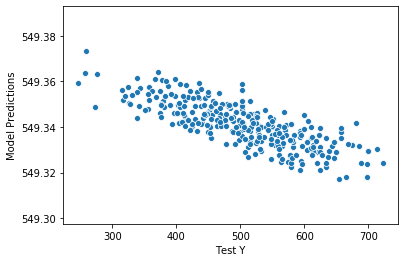

In [51]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [0]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

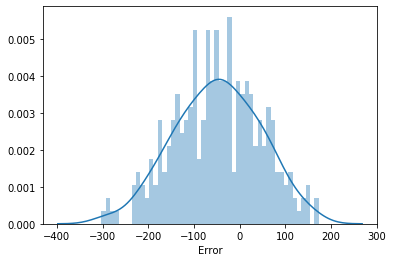

In [55]:
sns.distplot(pred_df['Error'],bins=50)

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

85.08156543168352

In [60]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

11191.16586772352

In [0]:

# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [64]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [0]:
new_gem = scaler.transform(new_gem)

In [68]:
model.predict(new_gem)

array([[471.5849]], dtype=float32)

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('my_model.h5')  

In [73]:
later_model = load_model('my_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [74]:
later_model.predict(new_gem)

array([[471.5849]], dtype=float32)